In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import pandas as pd
import numpy as np

import time
from tqdm import tqdm
import datetime as dt
import pickle # read that in python3 pickle uses cpickle where possible
import re

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import plotly as py
import plotly.graph_objs as go
py.offline.init_notebook_mode(connected=True)

pd.set_option("display.max_colwidth", 200)
pd.set_option("display.max_columns", 10)

In [4]:
path = '/home/franzi/Git-DSR/Twitter_sentimentanalysis/Data/all_data.pickle'
print('loading data from pickle')
with open(path, 'rb') as fid:
    data = pickle.load(fid)
    print('data loaded')

loading data from pickle
data loaded


# Time series of tweets per minute

Count all tweets per timeframe and plot the tweetcount against time

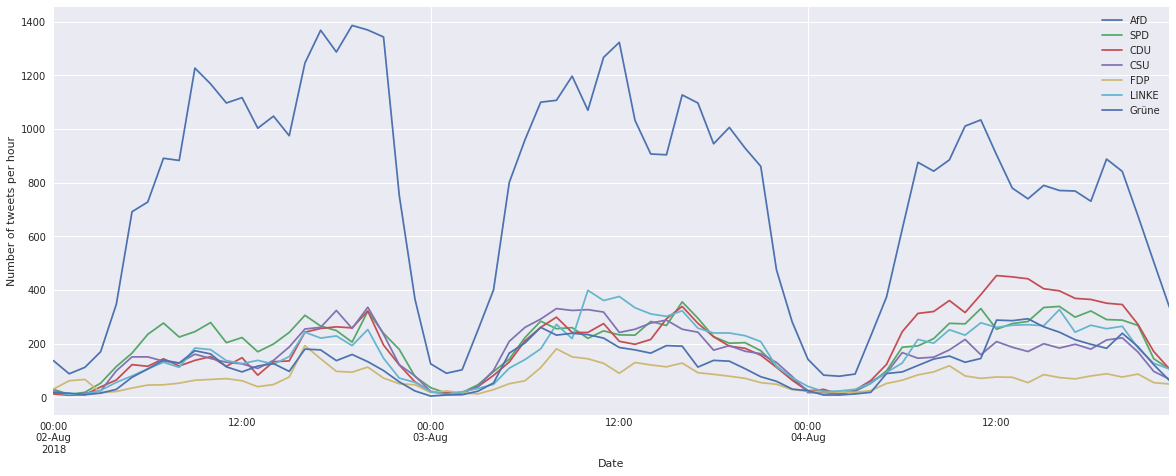

In [7]:
parties = ['AfD', 'SPD', 'CDU', 'CSU', 'FDP', 'LINKE', 'Grüne']


plt.figure(figsize=(20, 7.5))
ax = plt.axes()
for party in parties:
    data[party].loc[:, 'full_text'].resample('h').count().plot(ax=ax, label=party)
plt.legend()
plt.ylabel("Number of tweets per hour")
plt.xlabel("Date") 
# ax.grid(axis='both')
plt.show()

In [8]:
def plot_tweetcount(df_list):
    """
    Interactive plotly plot that shows exactly the same data as the previous plot but is interactive.
    """
    
#     define color for the respective party !sequence matters!
    party_colors = [['AfD', 'rgb(26, 124, 199)'],
                    ['SPD', 'rgb(210, 0, 0)'], 
                    ['CDU', 'rgb(0, 29, 77)'], 
                    ['CSU', 'rgb(26, 117, 255)'], 
                    ['LINKE', 'rgb(204, 0, 102)'], 
                    ['FDP', 'rgb(255, 204, 0)'], 
                    ['Gruene', 'rgb(0, 204, 0)']]
    
    traces = []

   
    for party, color in party_colors:
#         define the number of tweets per hour
        df = df_list[party]
        tweetcount = pd.DataFrame(df.loc[:, 'full_text'].
                                  resample('h').
                                  count())
#     define the traces for the plotly plot
        trace = go.Scatter(y = tweetcount.loc[:, 'full_text'],
                           x = tweetcount.index,
                           line = {'color': color},
                           name = party)
        traces.append(trace)
        
    
    layout = go.Layout(title='Party tweet-count per hour',
                       yaxis = dict(title='Tweets per hour'),
                       xaxis = dict(title='Days'))
    
    hourly_tweetcount = go.Figure(data=traces, layout=layout)
    py.offline.iplot(hourly_tweetcount)

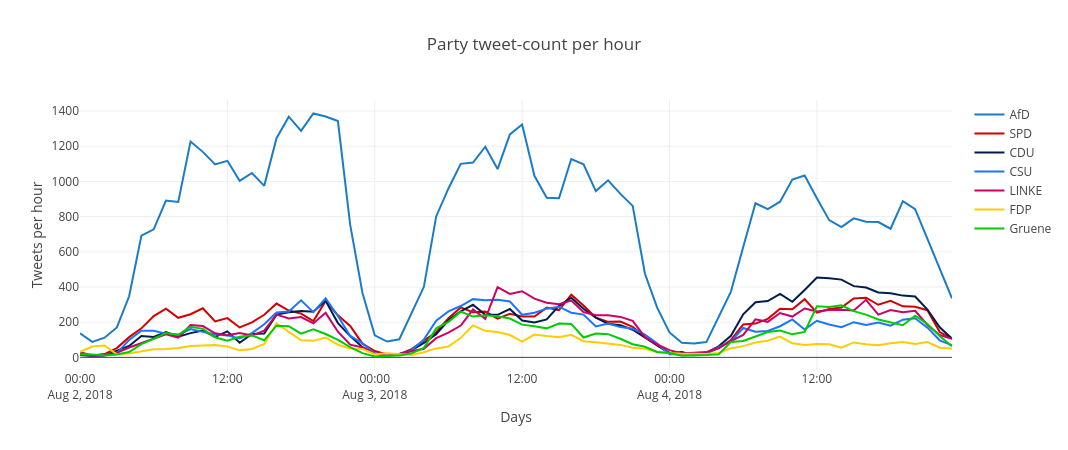

In [9]:
plot_tweetcount(data)